# NYC Parking Violation Data Analysis

### What are the total number of violation in 2020 and 2019?
- Pandemic causing the number of cars on the road lesser and cause lesser violation

In [64]:
# import lib
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import datetime as dt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr

In [3]:
# import data 
parking_2020 = pd.read_csv("../data/parking_df_2020.csv")
parking_2019 = pd.read_csv("../data/parking_df_2019.csv")

In [4]:
parking_df = pd.read_csv("../data/clean_parking_df.csv")

In [71]:
parking_df["Issue Date"] = pd.to_datetime(parking_df["Issue Date"])
parking_2020["Issue Date"] = pd.to_datetime(parking_2020["Issue Date"])
parking_2019["Issue Date"] = pd.to_datetime(parking_2019["Issue Date"])

In [112]:
parking_2019["Violation Time"] = pd.to_datetime(parking_2019["Violation Time"])
parking_2020["Violation Time"] = pd.to_datetime(parking_2020["Violation Time"])

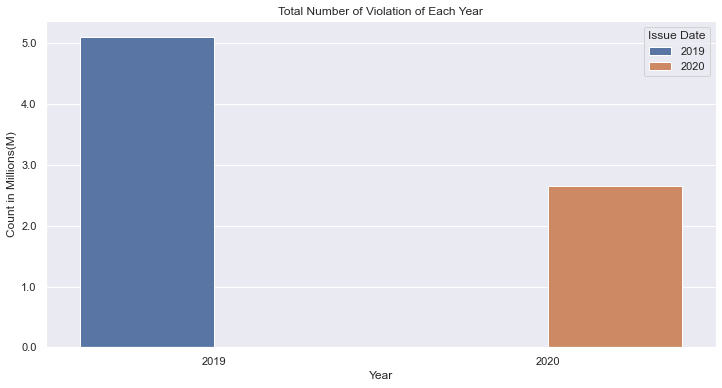

In [51]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)

formatter = FuncFormatter(millions)

f1, ax1 = plt.subplots(figsize=(12,6))
# ax1 = sns.set_theme(style="darkgrid")

ax1 = sns.countplot(x=parking_df['Issue Date'].dt.year, data=parking_df , hue=parking_df['Issue Date'].dt.year)
ax1.set(xlabel='Year', ylabel='Count in Millions(M)' , title="Total Number of Violation of Each Year")
ax1.yaxis.set_major_formatter(formatter)


### What are the top 10 violation for 2020? 

In [52]:
violation_code = pd.read_csv("../data/violation_code_2020.csv")
violation_code = violation_code.iloc[:, :-2]
violation_code.head()

,VIOLATION CODE,VIOLATION DESCRIPTION
0,1,FAILURE TO DISPLAY BUS PERMIT
1,2,NO OPERATOR NAM/ADD/PH DISPLAY
2,3,UNAUTHORIZED PASSENGER PICK-UP
3,4,BUS PARKING IN LOWER MANHATTAN
4,5,BUS LANE VIOLATION


In [53]:
# get top 10 of violation code 
def get_top_violation(amount,series):
    top_violation = series.value_counts()[:amount]
    top_violation = top_violation.to_frame()
    top_violation = top_violation.merge(violation_code, left_index=True, right_index=True)
    top_violation = top_violation.rename(columns={'Violation Code' : 'Count' , 'VIOLATION CODE': 'Violation Code', 'VIOLATION DESCRIPTION': 'Violation Description'})
    return top_violation

In [56]:
top10_violation_2019 = get_top_violation(10, parking_2019['Violation Code'])
top10_violation_2020 = get_top_violation(10, parking_2020['Violation Code'])

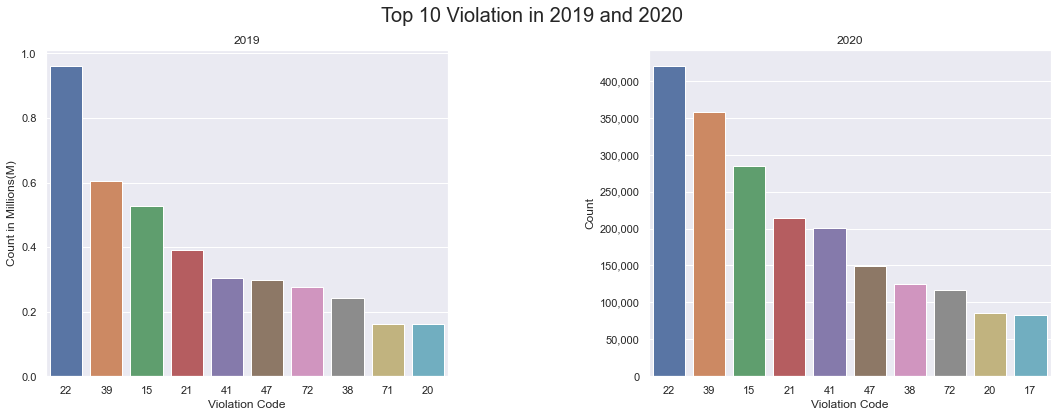

In [69]:
f2, (ax2, ax3) = plt.subplots(1, 2 , figsize=(18,6))
f2.subplots_adjust(wspace=0.5)
f2.suptitle('Top 10 Violation in 2019 and 2020' , fontsize="20")
ax2 = sns.barplot(x="Violation Code", y="Count", data=top10_violation_2019, order=top10_violation_2019.sort_values('Count',ascending = False)['Violation Code'],ax=ax2)
ax3 = sns.barplot(x="Violation Code", y="Count", data=top10_violation_2020, order=top10_violation_2020.sort_values('Count',ascending = False)['Violation Code'], ax=ax3)
ax2.set(ylabel='Count in Millions(M)' , title="2019")
ax3.set(ylabel='Count' , title="2020")
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))


### When are tickets most likely to be issued?

##### Monthly Analysis (2020)

In [84]:
parking_2020['Month Issued'] = parking_2020['Issue Date'].dt.month

Text(0.5, 1.0, 'Numbers of Parking Violation in NYC(Monthly) 2020 ')

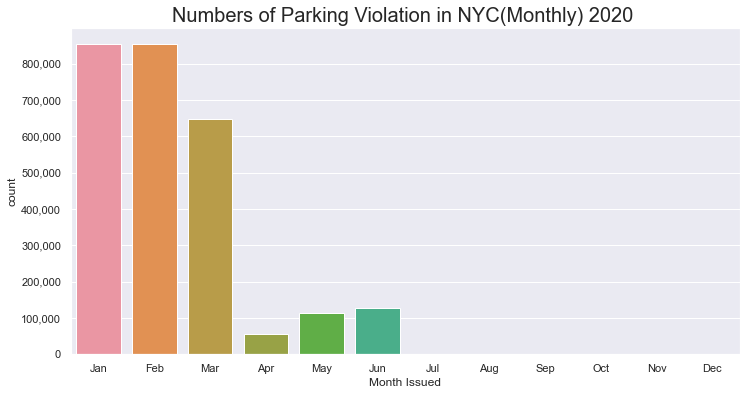

In [93]:
f3, ax4 = plt.subplots(figsize=(12, 6))

list_of_months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov', 'Dec']

sns.countplot(x="Month Issued", data=parking_2020)

ax4.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

ax4.set_xticklabels(list_of_months)
plt.title("Numbers of Parking Violation in NYC(Monthly) 2020 " , fontsize="20")

##### Monthly Analysis (2019)


In [89]:
parking_2019['Month Issued'] = parking_2019['Issue Date'].dt.month

Text(0.5, 1.0, 'Numbers of Parking Violation in NYC(Monthly) 2019 ')

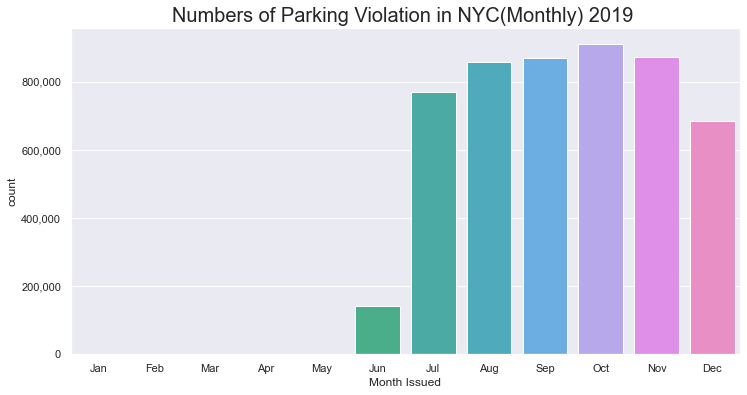

In [92]:
f6, ax7 =  plt.subplots(figsize=(12, 6))
sns.countplot(x="Month Issued", data=parking_2019)

ax7.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

ax7.set_xticklabels(list_of_months)
plt.title("Numbers of Parking Violation in NYC(Monthly) 2019 ",  fontsize="20")

##### Weekly Analysis(2020)

In [72]:
parking_2020['Day of Week Issued'] = parking_2020['Issue Date'].dt.dayofweek

Text(0.5, 1.0, 'Daily Number of Parking Violation in NYC 2020')

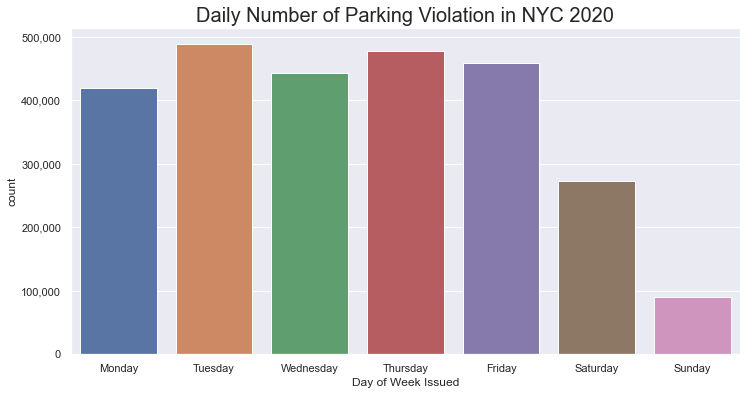

In [82]:
f4, ax5 = plt.subplots(figsize=(12, 6))

list_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x="Day of Week Issued", data=parking_2020)

ax5.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

ax5.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Daily Number of Parking Violation in NYC 2020", fontsize='20')

In [76]:
def get_daily_top5_violation(day):
    # get only that day data
    daily_violation = parking_2020.loc[(parking_2020['Day of Week Issued'] == day)] 
    # get the top 5 of that day
    top5_violation_daily = daily_violation['Violation Code'].value_counts()[:5]
    top5_violation_daily = top5_violation_daily.to_frame()
    top5_violation_daily = top5_violation_daily.merge(violation_code, left_index=True, right_index=True)
    top5_violation_daily = top5_violation_daily.rename(columns={'Violation Code' : 'Count' , 'VIOLATION CODE': 'Violation Code', 'VIOLATION DESCRIPTION': 'Violation Description'})
    top5_violation_daily = top5_violation_daily.sort_values(by="Count",ascending=False)
    #return that day's top 5 
    return top5_violation_daily

Text(0.5, 0.98, 'Daily Top 5 Violations Count')

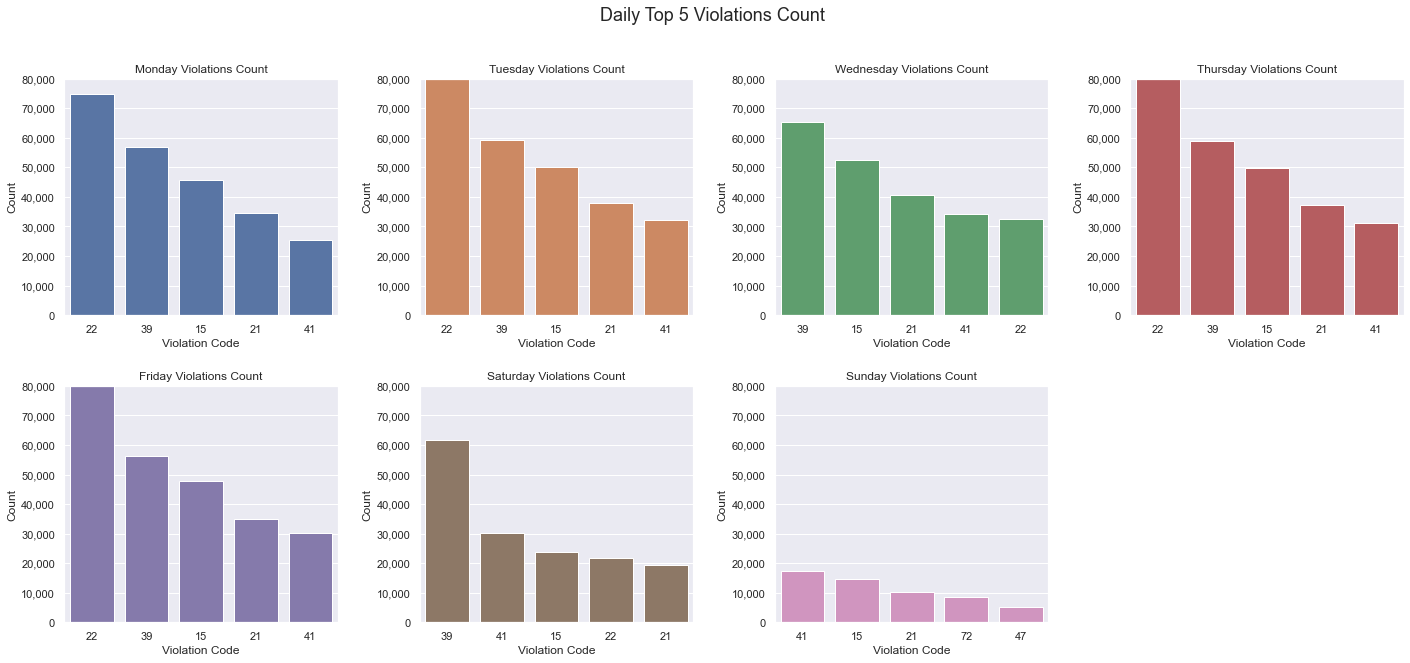

In [83]:
colors = plt.rcParams["axes.prop_cycle"]()
fig4 = plt.rcParams['font.size'] = '18'

f5 = plt.figure(figsize=(24,10))
f5.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(0, 7):
    c = next(colors)["color"]
    ax6 = f5.add_subplot(2, 4, i+1)
    daily_top5 = get_daily_top5_violation(i)
    sns.barplot(x="Violation Code", y="Count", data=daily_top5, order=daily_top5.sort_values('Count',ascending = False)['Violation Code'], color=c)
    ax6.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
    ax6.title.set_text(f'{list_of_days[i]} Violations Count')
    ax6.set_ylim(0, 80000)
f5.suptitle('Daily Top 5 Violations Count', fontsize=18)

##### Hourly Analysis (2020)

In [113]:
parking_time_hr = (parking_2020['Violation Time'].dt.hour).value_counts().sort_index()
parking_time_hr  = pd.DataFrame(parking_time_hr)
parking_time_hr = parking_time_hr.rename(columns={'Violation Time' : 'Count'})
parking_time_hr

,Count
0.0,18274
1.0,20091
2.0,16683
3.0,11492
4.0,5827
5.0,28540
6.0,74636
7.0,159152
8.0,280072
9.0,294884


[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Violation Count'),
 Text(0.5, 1.0, 'Numbers of Parking Violation in NYC (Hourly) 2020 ')]

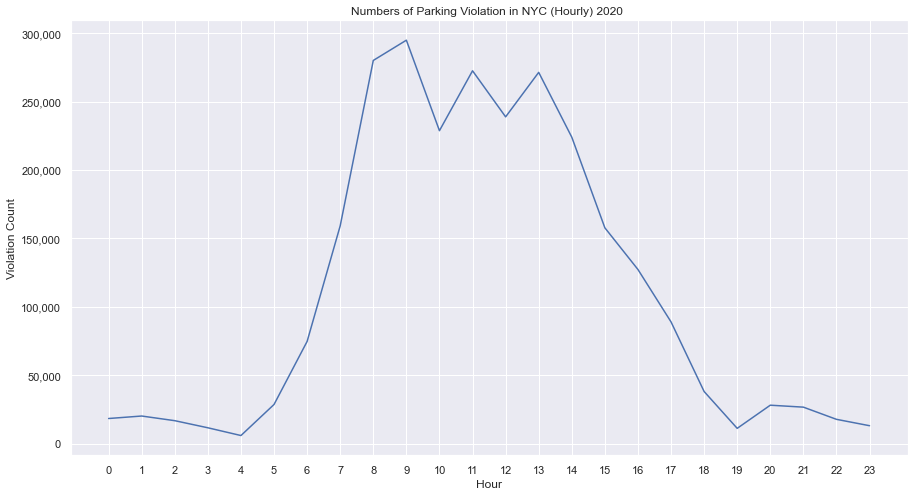

In [114]:
f7, ax8 = plt.subplots(figsize=(15, 8))

ax8 = sns.lineplot(x=parking_time_hr.index, y='Count', data=parking_time_hr)

ax8.set_xticks(np.arange(0,24))
ax8.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
ax8.set(xlabel ="Hour", ylabel = "Violation Count", title ='Numbers of Parking Violation in NYC (Hourly) 2020 ')


##### Hourly Analysis (2019)

In [116]:
parking_time_hr_2019 = (parking_2019['Violation Time'].dt.hour).value_counts().sort_index()
parking_time_hr_2019  = pd.DataFrame(parking_time_hr_2019)
parking_time_hr_2019 = parking_time_hr_2019.rename(columns={'Violation Time' : 'Count'})
parking_time_hr_2019

,Count
0.0,34315
1.0,36462
2.0,31553
3.0,22183
4.0,10157
5.0,55662
6.0,146529
7.0,307381
8.0,553053
9.0,571362


[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Violation Count'),
 Text(0.5, 1.0, 'Numbers of Parking Violation in NYC (Hourly) 2019 ')]

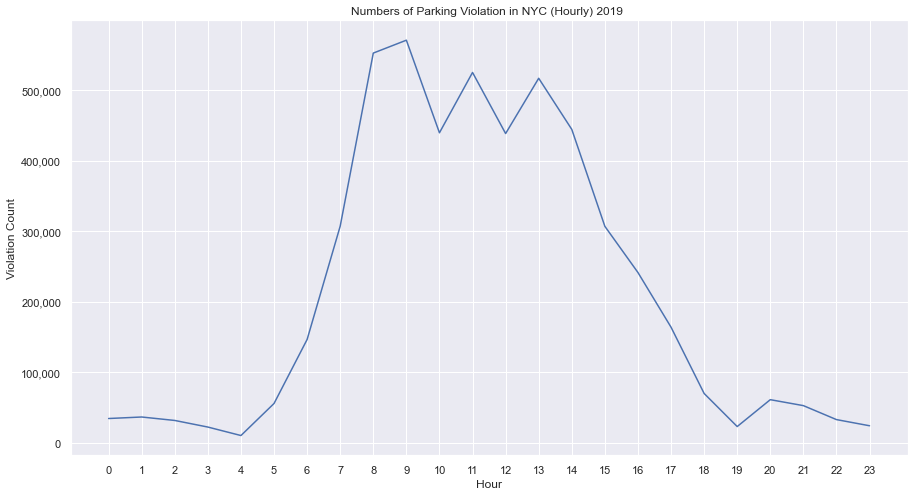

In [117]:
f8, ax9 = plt.subplots(figsize=(15, 8))

ax9 = sns.lineplot(x=parking_time_hr_2019.index, y='Count', data=parking_time_hr_2019)

ax9.set_xticks(np.arange(0,24))
ax9.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
ax9.set(xlabel ="Hour", ylabel = "Violation Count", title ='Numbers of Parking Violation in NYC (Hourly) 2019 ')


### Where are the tickets most commonly issued? 

##### County

In [118]:
parking_2020.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Location,Violation Time,Violation County,Vehicle Color,Day of Week Issued,Month Issued
0,7422527,1455215181,HFZ5939,NY,PAS,2020-01-01,9,SUBN,FORD,K,34.0,1900-01-01 11:00:00,NY,BLK,2,1
1,7422528,8799951230,CGW5490,NY,PAS,2020-01-01,71,SUBN,TOYOT,T,14.0,1900-01-01 18:09:00,NY,GY,2,1
2,7422529,8799951228,Z33LSJ,NJ,PAS,2020-01-01,14,SUBN,TOYOT,T,14.0,1900-01-01 18:05:00,NY,BLACK,2,1
3,7422530,8802758803,F19LPX,NJ,PAS,2020-01-01,40,4DSD,TOYOT,T,14.0,1900-01-01 18:44:00,NY,BLACK,2,1
4,7422531,8802758797,6DB3277,MD,PAS,2020-01-01,13,4DSD,NISSA,T,14.0,1900-01-01 18:40:00,NY,GREY,2,1


Text(0.5, 1.0, 'Number of Violation vs County (2020)')

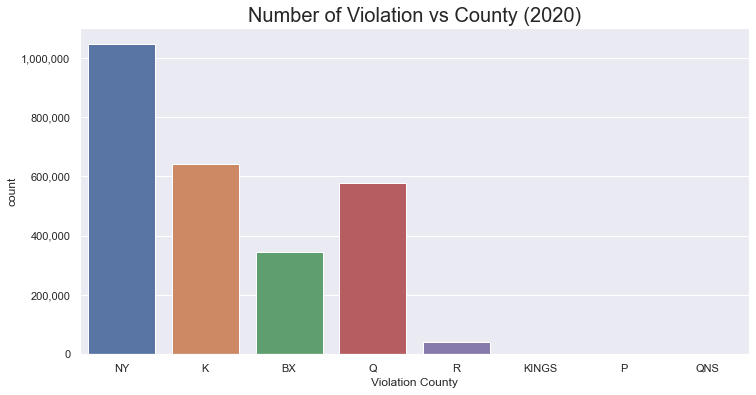

In [120]:
f9, ax10 = plt.subplots(figsize=(12, 6))

sns.countplot(x="Violation County", data=parking_2020)

ax10.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

plt.title("Number of Violation vs County (2020)", fontsize='20')

### What are the most common types of cars to be ticketed?

In [130]:
def get_top_5(series_name):
    top5_violation = parking_2020[series_name].value_counts()[:5]
    top5_violation = top5_violation.to_frame()
    top5_violation = top5_violation.rename(columns={series_name : 'Count'})
    top5_violation = top5_violation.sort_values(by="Count",ascending=False)
    return top5_violation

In [186]:
def draw_barplot(series , title):
    fig, axis = plt.subplots(figsize=(12, 6))
    sns.barplot(x=series.index,y="Count", data=series)
    axis.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
    plt.title(title, fontsize='20')

##### Vehicle Body Type(Sedan, etc) - top 5

In [138]:
top5 = get_top_5("Vehicle Body Type")
top5

,Count
SUBN,965995
4DSD,677013
VAN,448409
DELV,186685
PICK,74364


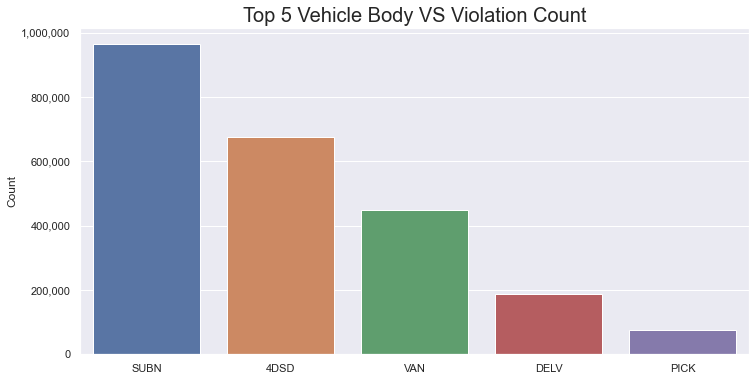

In [139]:
draw_barplot(top5 , "Top 5 Vehicle Body VS Violation Count")

##### Vehicle Make (Brand)

In [140]:
top5 = get_top_5('Vehicle Make')
top5

,Count
FORD,323085
HONDA,263597
TOYOT,261578
NISSA,204946
FRUEH,171986


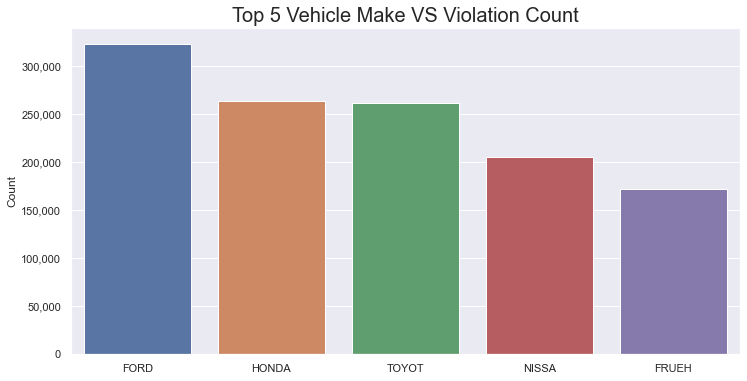

In [141]:
draw_barplot(top5 , "Top 5 Vehicle Make VS Violation Count")

In [157]:
vehicle_make_count = parking_2020["Vehicle Make"].value_counts()[:5]
vehicle_make_count

FORD     323085
HONDA    263597
TOYOT    261578
NISSA    204946
FRUEH    171986
Name: Vehicle Make, dtype: int64

In [174]:
# get row that is FREUH 
freuh_violation = parking_2020[parking_2020["Vehicle Make"] == "FRUEH"]
freuh_violation.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Location,Violation Time,Violation County,Vehicle Color,Day of Week Issued,Month Issued
15,7422826,1465870726,65903MJ,NY,COM,2020-01-01,78,DELV,FRUEH,S,61.0,1900-01-01 01:49:00,K,WHITE,2,1
23,7422837,1465574906,R435277,TX,PAS,2020-01-01,78,TRUC,FRUEH,P,75.0,1900-01-01 22:06:00,K,WHT,2,1
30,7422845,1465574219,2737227,IN,PAS,2020-01-01,40,DELV,FRUEH,P,75.0,1900-01-01 00:58:00,K,WHT,2,1
34,7422853,1464770463,68580MM,NY,COM,2020-01-01,46,VAN,FRUEH,P,18.0,1900-01-01 19:12:00,NY,WH,2,1
35,7422854,1464770451,89615X,WI,PAS,2020-01-01,14,DELV,FRUEH,P,13.0,1900-01-01 17:09:00,NY,WH,2,1


In [180]:
freuh_violation_top5 = freuh_violation['Violation Code'].value_counts()[:5]
freuh_violation_top5 = freuh_violation_top5.to_frame()
freuh_violation_top5 = freuh_violation_top5.merge(violation_code, left_index=True, right_index=True)
freuh_violation_top5 = freuh_violation_top5.rename(columns={'Violation Code' : 'Count' , 'VIOLATION CODE': 'Violation Code', 'VIOLATION DESCRIPTION': 'Violation Description'})
freuh_violation_top5 = freuh_violation_top5.sort_values(by="Count",ascending=False)
freuh_violation_top5["Violation Description"] = freuh_violation_top5["Violation Description"].str.title()
freuh_violation_top5["Code and Description"]  = freuh_violation_top5["Violation Code"].map(str) + " - " + freuh_violation_top5["Violation Description"]
freuh_violation_top5

,Count,Violation Code,Violation Description,Code and Description
14,35928,15,No Standing-Off-Street Lot,15 - No Standing-Off-Street Lot
46,26831,47,Double Parking-Midtown Comml,47 - Double Parking-Midtown Comml
84,14129,85,Storage-3Hr Commercial,85 - Storage-3Hr Commercial
19,13602,20,No Parking-Day/Time Limits,20 - No Parking-Day/Time Limits
20,13262,21,No Parking-Street Cleaning,21 - No Parking-Street Cleaning


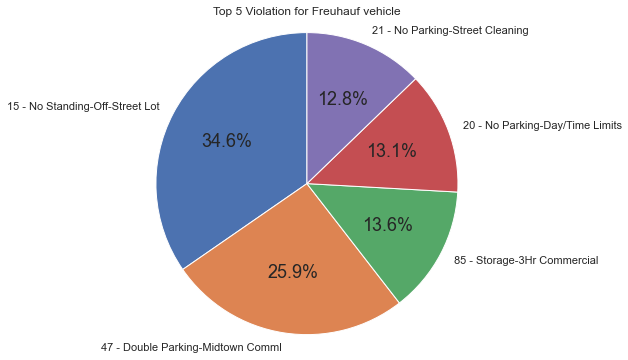

In [187]:
f10, ax11 = plt.subplots(figsize=(6,6))
ax11.pie(freuh_violation_top5['Count'],labels=freuh_violation_top5["Code and Description"], autopct='%1.1f%%',
        startangle=90)
plt.title('Top 5 Violation for Freuhauf vehicle')
ax11.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Plate Type

In [189]:
top5 = get_top_5('Plate Type')
top5

,Count
PAS,1918442
COM,546736
OMT,87074
APP,22507
SRF,20324


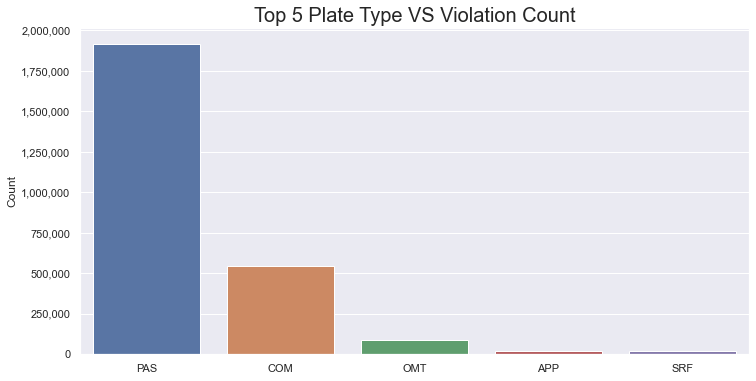

In [190]:
draw_barplot(top5 , "Top 5 Plate Type VS Violation Count")

##### Registration State

In [149]:
top5 = get_top_5('Registration State')
top5

,Count
NY,2015511
NJ,266022
PA,72606
IN,42669
FL,33833


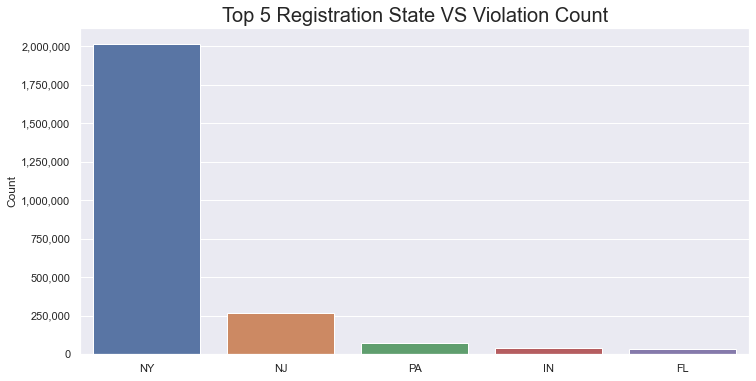

In [150]:
draw_barplot(top5 , "Top 5 Registration State VS Violation Count")

In [191]:
top5 = get_top_5('Vehicle Body Type')
top5

,Count
SUBN,965995
4DSD,677013
VAN,448409
DELV,186685
PICK,74364


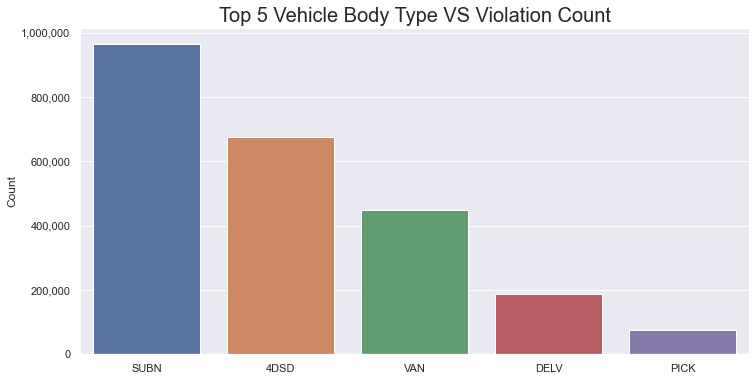

In [192]:
draw_barplot(top5 , "Top 5 Vehicle Body Type VS Violation Count")

### Who are the common issuing agency?

In [151]:
top5 = get_top_5('Issuing Agency')
top5

,Count
T,2448167
P,103980
S,92495
X,4969
K,2315


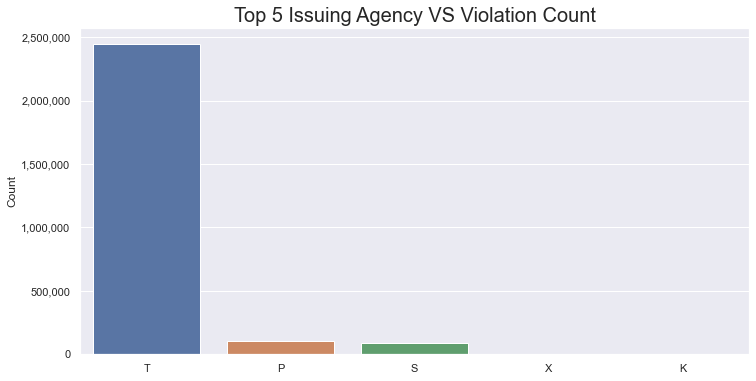

In [152]:
draw_barplot(top5 , "Top 5 Issuing Agency VS Violation Count")

In [200]:
dep_of_sani = parking_2020[parking_2020["Issuing Agency"] == "S"]
dep_of_sani.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Location,Violation Time,Violation County,Vehicle Color,Day of Week Issued,Month Issued
13,7422824,1465870740,45920MH,NY,COM,2020-01-01,78,DELV,GMC,S,61.0,1900-01-01 01:56:00,K,YELLO,2,1
14,7422825,1465870738,53429JJ,NY,COM,2020-01-01,78,P-U,GMC,S,61.0,1900-01-01 01:52:00,K,RED,2,1
15,7422826,1465870726,65903MJ,NY,COM,2020-01-01,78,DELV,FRUEH,S,61.0,1900-01-01 01:49:00,K,WHITE,2,1
16,7422827,1465870714,30439ML,NY,COM,2020-01-01,78,SUBN,FORD,S,61.0,1900-01-01 01:45:00,K,WHITE,2,1
17,7422828,1465870702,29636MN,NY,COM,2020-01-01,78,VAN,FORD,S,61.0,1900-01-01 01:41:00,K,WHITE,2,1


In [201]:
dep_of_sani_top5 = dep_of_sani['Violation Code'].value_counts()[:5]
dep_of_sani_top5 = dep_of_sani_top5.to_frame()
dep_of_sani_top5 = dep_of_sani_top5.merge(violation_code, left_index=True, right_index=True)
dep_of_sani_top5 = dep_of_sani_top5.rename(columns={'Violation Code' : 'Count' , 'VIOLATION CODE': 'Violation Code', 'VIOLATION DESCRIPTION': 'Violation Description'})
dep_of_sani_top5 = dep_of_sani_top5.sort_values(by="Count",ascending=False)
dep_of_sani_top5["Violation Description"] = dep_of_sani_top5["Violation Description"].str.title()
dep_of_sani_top5["Code and Description"]  = dep_of_sani_top5["Violation Code"].map(str) + " - " + dep_of_sani_top5["Violation Description"]
dep_of_sani_top5

,Count,Violation Code,Violation Description,Code and Description
21,72740,22,No Stand Taxi/Fhv Relief Stand,22 - No Stand Taxi/Fhv Relief Stand
66,4328,67,Pedestrian Ramp,67 - Pedestrian Ramp
85,3332,86,Midtown Pkg Or Std-3Hr Limit,86 - Midtown Pkg Or Std-3Hr Limit
78,2741,79,Unauthorized Bus Layover,79 - Unauthorized Bus Layover
40,2067,41,Miscellaneous,41 - Miscellaneous


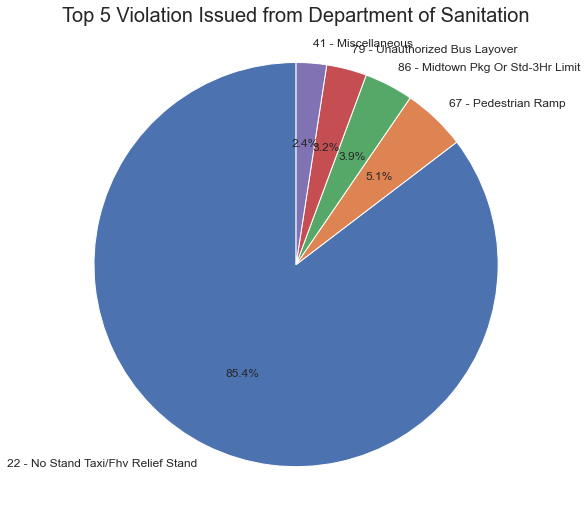

In [210]:
textprops = {"fontsize":12}

f11, ax12 = plt.subplots(figsize=(8,8))
ax12.pie(dep_of_sani_top5['Count'],labels=dep_of_sani_top5["Code and Description"], autopct='%1.1f%%',textprops =textprops,
        startangle=90)
plt.title('Top 5 Violation Issued from Department of Sanitation', fontsize=20)
ax12.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
f11.subplots_adjust(top=0.95)
plt.show()